## Imports

In [10]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [11]:
def solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    for n in range(nt + 1):
      for j in range(row):
        for i in range(col):
          un[j][i] = u[j][i]
          vn[j][i] = v[j][i] 
      
      for j in range(2, row):
        for i in range(2, col): 
          u[j-1, i-1] = (un[i-1, j-1] - dt / dx * un[j-1, i-1] * 
                         (un[j-1, i-1] - un[j-1, i-2]) - dt / dy *
                         vn[j-1, i-1] * (un[j-1, i-1] - un[j-2, i-1]) +
                         nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] +
                         un[j-1, i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 *
                        un[j-1, i-1] + un[j-2, i-1])) 

          v[j-1, i-1] = (vn[j-1, 1-1] -dt / dx * un[j-1, i-1] * (vn[j-1, i-1]-
                         vn[j-1, i-2]) -dt / dy * vn[j-1, i-1] * (vn[j-1, i-1]-
                         vn[j-2, i-1]) + nu * dt / dx**2 * (vn[j-1, i] - 2 *
                         vn[j-1, i-1] + vn[j-1, i-2]) + nu * dt / dy**2 *
                         (vn[j, i-1] - 2 * vn[j-1, i-1] + vn[j-2, i-1])) 
          
          u[0, :], v[0, :] = 1,1
          u[-1, :], v[-1, :] = 1,1
          u[:, 0], v[:, 0] = 1,1
          u[:, -1], v[:, -1] = 1,1
          
        
    return 0

## Numba accelerator

In [12]:

    
@njit(fastmath=True)
def solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    for n in range(nt + 1):
      for j in range(row):
        for i in range(col):
          un[j][i] = u[j][i]
          vn[j][i] = v[j][i] 
      
      for j in range(2, row):
        for i in range(2, col): 
          u[j-1, i-1] = (un[i-1, j-1] - dt / dx * un[j-1, i-1] * 
                         (un[j-1, i-1] - un[j-1, i-2]) - dt / dy *
                         vn[j-1, i-1] * (un[j-1, i-1] - un[j-2, i-1]) +
                         nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] +
                         un[j-1, i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 *
                        un[j-1, i-1] + un[j-2, i-1])) 

          v[j-1, i-1] = (vn[j-1, 1-1] -dt / dx * un[j-1, i-1] * (vn[j-1, i-1]-
                         vn[j-1, i-2]) -dt / dy * vn[j-1, i-1] * (vn[j-1, i-1]-
                         vn[j-2, i-1]) + nu * dt / dx**2 * (vn[j-1, i] - 2 *
                         vn[j-1, i-1] + vn[j-1, i-2]) + nu * dt / dy**2 *
                         (vn[j, i-1] - 2 * vn[j-1, i-1] + vn[j-2, i-1])) 
          
          u[0, :], v[0, :] = 1,1
          u[-1, :], v[-1, :] = 1,1
          u[:, 0], v[:, 0] = 1,1
          u[:, -1], v[:, -1] = 1,1
          
        
    return 0

## Pyccel accelerator

In [13]:
def solve_2d_burger_pyccel(u:'float[:,:]', un:'float[:,:]', v:'float[:,:]', vn:'float[:,:]', nt:'int', dt:'float', dx:'float', dy:'float', nu:'float'):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    
    for n in range(nt + 1):
      for j in range(row):
        for i in range(col):
          un[j][i] = u[j][i]
          vn[j][i] = v[j][i] 
      
      for j in range(2, row):
        for i in range(2, col): 
          u[j-1, i-1] = (un[i-1, j-1] - dt / dx * un[j-1, i-1] * (un[j-1, i-1] - un[j-1, i-2]) - dt / dy * vn[j-1, i-1] * (un[j-1, i-1] - un[j-2, i-1]) + nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] + un[j-1, i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 * un[j-1, i-1] + un[j-2, i-1])) 

          v[j-1, i-1] = (vn[j-1, 1-1] -dt / dx * un[j-1, i-1] * (vn[j-1, i-1]- vn[j-1, i-2]) -dt / dy * vn[j-1, i-1] * (vn[j-1, i-1]- vn[j-2, i-1]) + nu * dt / dx**2 * (vn[j-1, i] - 2 * vn[j-1, i-1] + vn[j-1, i-2]) + nu * dt / dy**2 * (vn[j, i-1] - 2 * vn[j-1, i-1] + vn[j-2, i-1])) 
          
          u[0, :] = 1
          v[0, :] = 1

          u[-1, :]= 1
          v[-1, :] = 1

          u[:, 0] = 1
          v[:, 0] = 1

          u[:, -1] = 1
          v[:, -1] = 1
          
        
    return 0

## Inputs

/tmp/ipykernel_11852/978572681.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


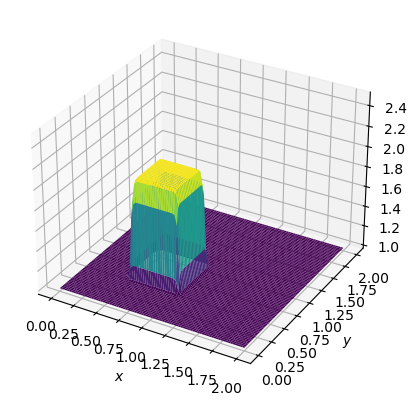

In [14]:
###variable declarations
nx = 81
ny = 81
nt = 210
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .001
nu = 0.07
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))

solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Call Funtions

### Pure function

In [18]:
%timeit solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

37.8 s ± 203 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [15]:
%timeit solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu)

174 ms ± 793 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [16]:
solve_2d_burger_f90 = epyccel(solve_2d_burger_pyccel)

In [17]:
%timeit solve_2d_burger_f90(u, un, v, vn, nt, dt, dx, dy, nu)

177 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Nous remrquons que numba et pyccel affichent un peu pres les meme performance, nous pensons que c'est logique puisque le point fort de pyccel est que python a un savoir d'avance sur les types de variables, alors que pour cette fonction on a plusieurs etapes ou les variables ont reconnu des modifications donc nous avons une convergence vers le temps de caclul de numba car nous avons un peu pres la meme procedure de caclucl.